In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

data = pd.read_csv("../bank.csv")

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [25]:
data_to_use = data[["age", "balance", "day", "duration", #numericas
                  "job", "marital", "education", "contact", #categoricas
                  "deposit"]] # a predecir

data_to_use.head()

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,yes
1,56,45,5,1467,admin.,married,secondary,unknown,yes
2,41,1270,5,1389,technician,married,secondary,unknown,yes
3,55,2476,5,579,services,married,secondary,unknown,yes
4,54,184,5,673,admin.,married,tertiary,unknown,yes


OneHotEncoder - Automatizado con una función  

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Automatizamos el encodeo de las columnas categoricas
def encodeColumns (col_name, df_to_modify): 
    ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
    for col in col_name: 
        ohe_col = ohe.fit_transform(df_to_modify[[col]])
        df_to_modify = pd.concat([df_to_modify, ohe_col], axis = 1).drop(columns = [col])

    return df_to_modify


In [27]:
columns_to_encode = ["job", "marital", "education", "contact"]
parameters_df = encodeColumns(columns_to_encode, data_to_use)

parameters_df = parameters_df.drop(columns = ["deposit"])
parameters_df.head()

,age,balance,day,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,59,2343,5,1042,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Decission Tree Classifier

In [28]:
from sklearn.model_selection import train_test_split

# Preparamos los dataframes a utilizar y vemos sus shapes
X_df = parameters_df
y_df = data_to_use[["deposit"]]

print(X_df.shape)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


(11162, 26)


((8929, 26), (2233, 26), (8929, 1), (2233, 1))

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(max_depth = 3)

exploración de posibles hiperparametros

In [30]:
from sklearn.model_selection import RandomizedSearchCV
#  Definir la grilla de hiperparámetros para el decision tre clasiffier

grilla_de_params = {
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10, 15, 20],
    "max_features": [None, "auto", "sqrt", "log2"],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_leaf_nodes": [None, 5, 10, 15, 20, 25]
}

# Realizar búsqueda aleatoria de hiperparámetros con KFold CV
random_search = RandomizedSearchCV(dt_model, grilla_de_params, n_iter = 100, cv = 5, random_state = 42, n_jobs = -1)
 
#entrenar el modelo
random_search.fit(X_train, y_train)

#ver los mejores hiperparametros
random_search.best_params_

#ver el mejor modelo
dt_model = random_search.best_estimator_

#entrenar el modelo con los mejores hiperparametros
dt_model.fit(X_train, y_train)




c:\Users\Lujan Sarmoria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
94 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lujan Sarmoria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lujan Sarmoria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Lujan Sarmoria\AppData\Local\Programs\Python\Pytho

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=10)

guardar un nuevo modelo con los mejores hiperparamentros encontrado

In [31]:
mejor_modelo = DecisionTreeClassifier(**random_search.best_params_)


mejor_modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=10)

Ahora analizamos su performance y mostramos su matriz de confusion sobre los datos de test

Accuracy:  0.7751903269144649


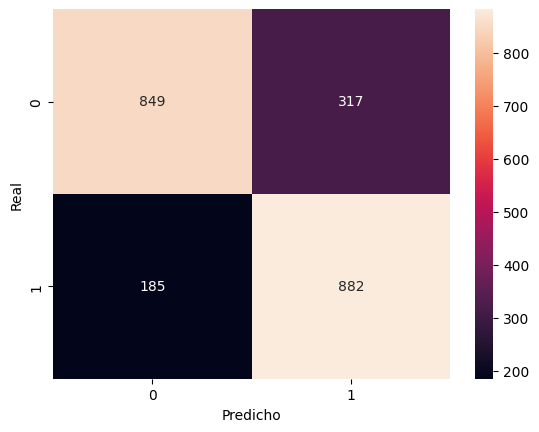

              precision    recall  f1-score   support

          no       0.82      0.73      0.77      1166
         yes       0.74      0.83      0.78      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.77      2233



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predecir con el modelo final
y_pred = mejor_modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

#matriz de confusión
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)

#matriz de confusión sobre los datos de test
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

print(classification_report(y_test, y_pred))

Graficando las hojas del Decission Tree Classifier

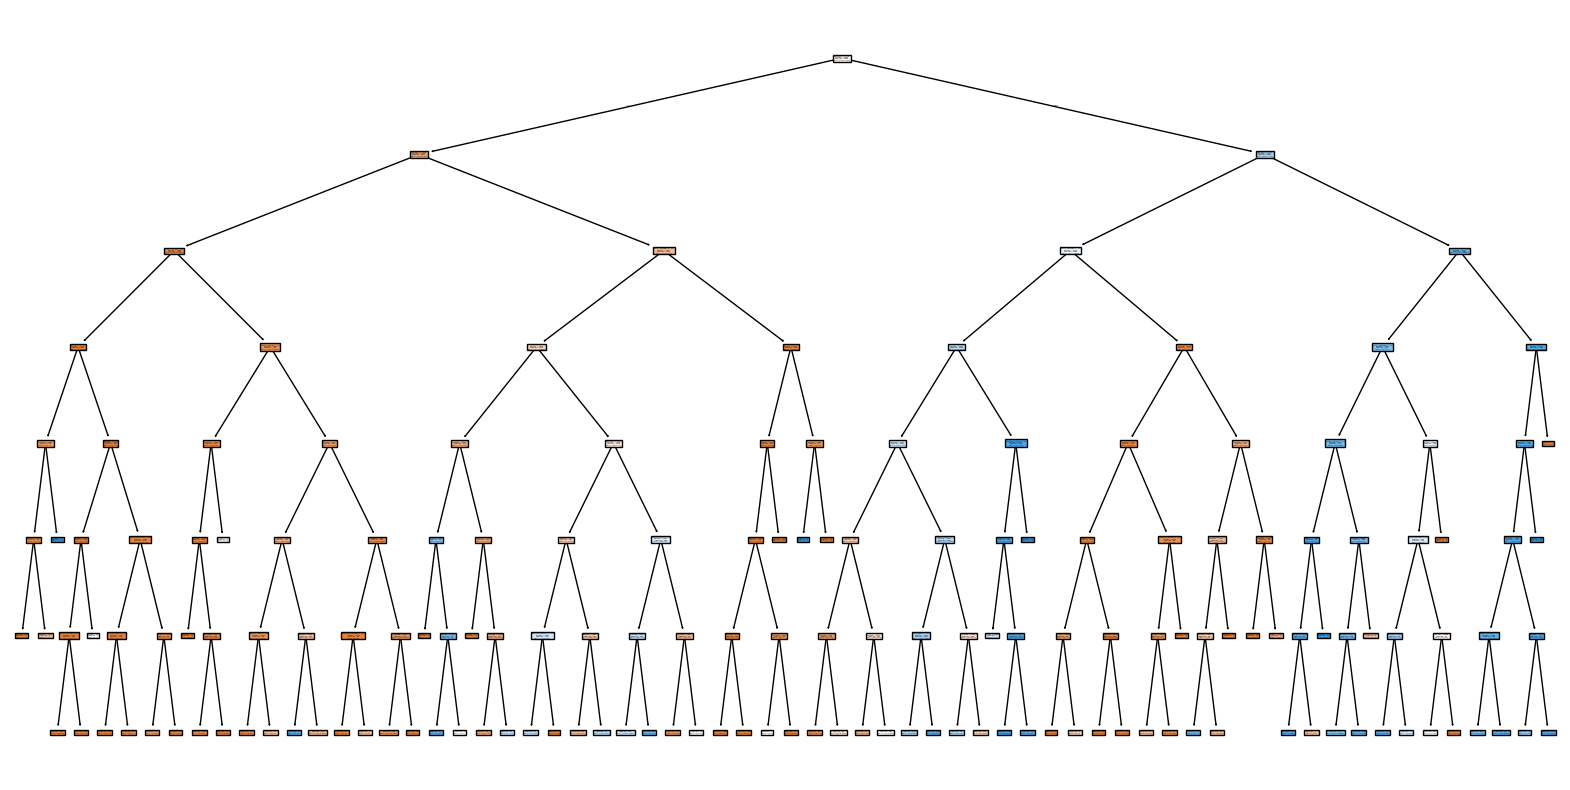

In [33]:
#dibujar el arbol
plt.figure(figsize = (20, 10))
plot_tree(mejor_modelo, feature_names = X_df.columns, filled = True)
plt.show()

ROC AUC Score Curve 

In [34]:
from sklearn.preprocessing import LabelEncoder

# convertir la variable deposit a binaria
y_pred = mejor_modelo.predict_proba(X_test)[:, 1]

# Convertir y_test a valores binarios
label_encoder = LabelEncoder()
y_test_bin = label_encoder.fit_transform(y_test)


c:\Users\Lujan Sarmoria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El score de la roc auc es:  0.846808431970498


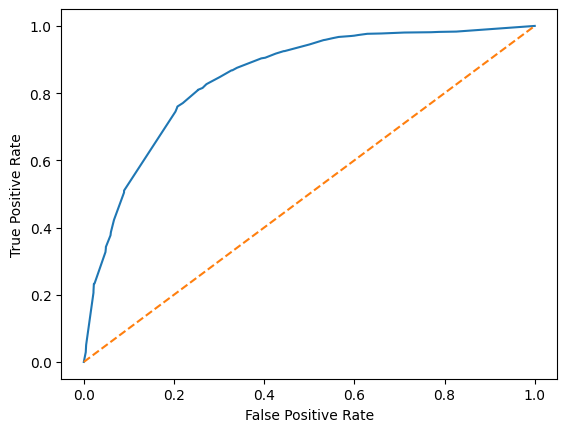

In [35]:
#roc auc score
from sklearn.metrics import roc_auc_score
roc_score =  roc_auc_score(y_test, y_pred) 
print ("El score de la roc auc es: ", roc_score)

#roc auc curve 
from sklearn.metrics import roc_curve

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred)

# Dibujar la curva ROC
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0, 1], [0, 1], linestyle = "--", label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

feature importances

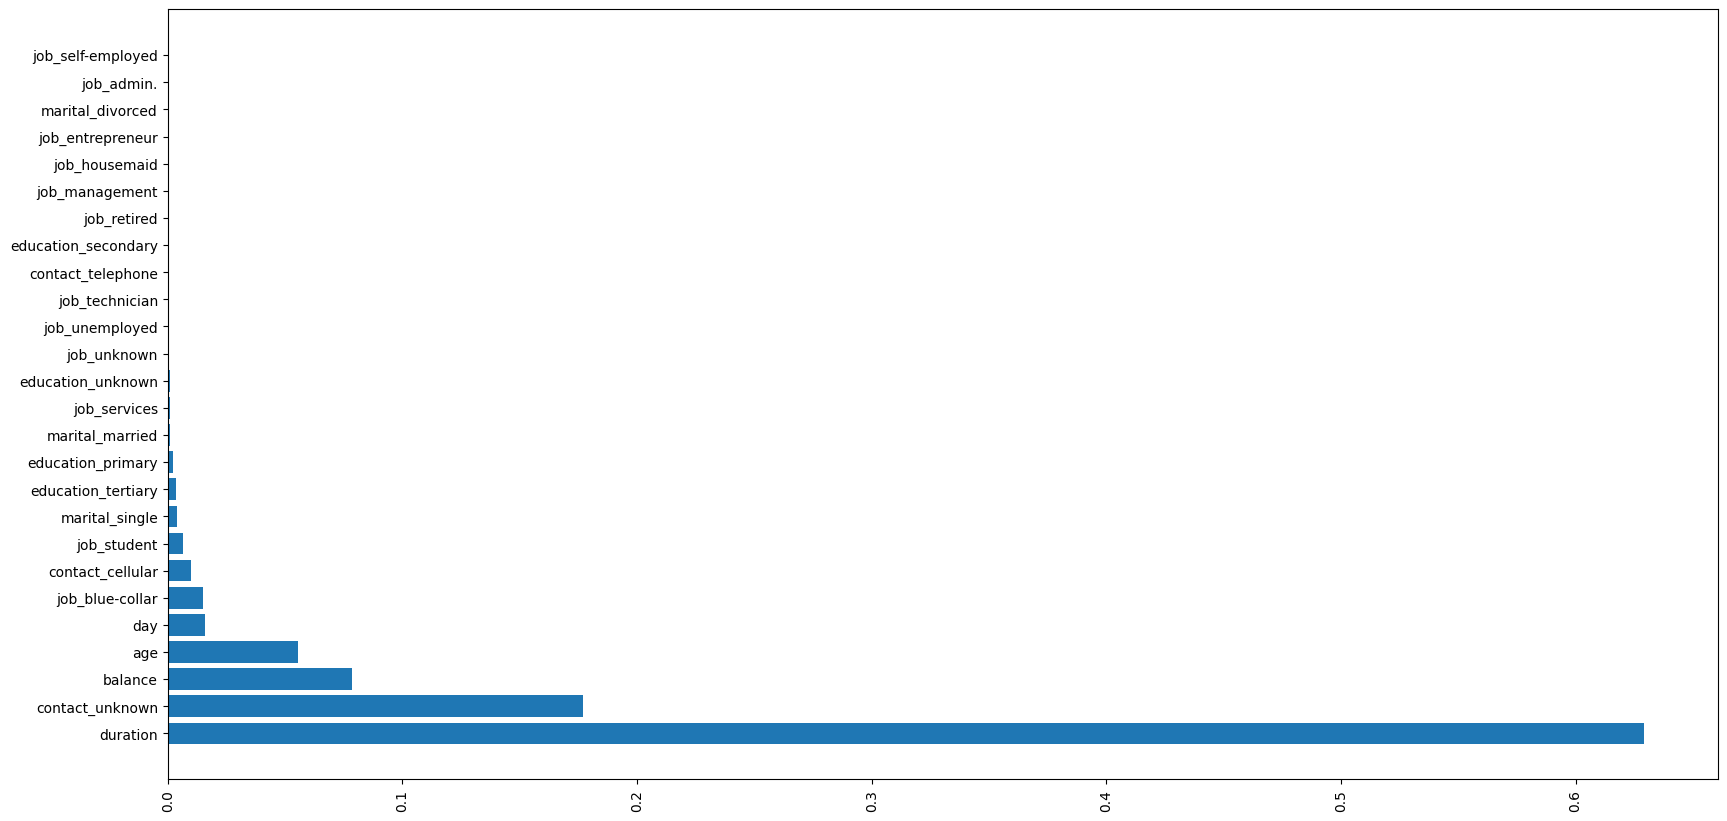

In [36]:
#feature importances
importances = mejor_modelo.feature_importances_
indices = np.argsort(importances)[::-1]

#mostrarlos en un grafico
plt.figure(figsize = (20, 10))
plt.barh(X_df.columns[indices], importances[indices])
plt.xticks(rotation = 90)
plt.show()


dataframe con la feature importances

In [37]:
pd.DataFrame(importances[indices], index = X_df.columns[indices], columns = ["Importance"])

,Importance
duration,0.629135
contact_unknown,0.176833
balance,0.078428
age,0.055679
day,0.015890
job_blue-collar,0.015235
contact_cellular,0.009927
job_student,0.006513
marital_single,0.003804
education_tertiary,0.003345


Bonus!

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

c:\Users\Lujan Sarmoria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [41]:
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print("Accuracy: ", rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy:  0.7850425436632333
              precision    recall  f1-score   support

          no       0.81      0.77      0.79      1166
         yes       0.76      0.80      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.78      2233
weighted avg       0.79      0.79      0.79      2233



Ahora, podemos entrenar a nuestro modelo de RandomForest con la busqueda de hiperparametros buscados anteriormente, cuando se entreno al arbol de decision

In [58]:
# Primero quitamos el hiperparametro que no puede recibir, en este caso splitter

best_params = random_search.best_params_

if 'splitter' in best_params: 
    del best_params['splitter']

best_params['n_estimators'] = 100

best_params

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 7,
 'criterion': 'entropy',
 'n_estimators': 100}

In [59]:
# Entrenamos al modelo con los mejores parametros

rf2 = RandomForestClassifier(**best_params)
rf2.fit(X_train, y_train)

c:\Users\Lujan Sarmoria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       min_samples_leaf=2, min_samples_split=10)

In [63]:
# Vemos como le fue al modelo 2 de RandomForest 

rf2.score(X_test, y_test)
y_pred2 = rf2.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.81      0.77      0.79      1166
         yes       0.76      0.80      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.78      2233
weighted avg       0.79      0.79      0.79      2233

